In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install omegaconf einops prdc pytorch-fid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  

In [2]:
!pip install hydra-core --upgrade

  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)


In [3]:
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 434.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu124
    Uninstalling tor

In [4]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00


In [5]:
%cd /content/drive/MyDrive/Projects/Resize/src

/content/drive/MyDrive/Projects/Resize/src


## Preprocess

In [ ]:
import json

path = "download/datasets/obello/raw/resizing_data.json"
with open(path, "r") as f:
    raw_data = json.load(f)

len(raw_data), raw_data[0]

(572,
 {'Input layout': {'id': '1f524b7aa18941329e46078b542bcb95',
   'groupId': '025c604be9f5447c8fd233bb25f90043',
   'width': 1080,
   'height': 1080,
   'elements': [{'class': 'graphicShape',
     'x': 40,
     'y': 40,
     'width': 300,
     'height': 240},
    {'class': 'logo', 'x': 60, 'y': 57, 'width': 258, 'height': 206},
    {'class': 'image', 'x': 380, 'y': 40, 'width': 660, 'height': 484},
    {'class': 'graphicShape', 'x': 40, 'y': 314, 'width': 300, 'height': 212},
    {'class': 'graphicShape', 'x': 40, 'y': 566, 'width': 1000, 'height': 474},
    {'class': 'headline', 'x': 100, 'y': 635, 'width': 757, 'height': 273}]},
  'Output layout': {'id': 'ac23607be6b64a74a9f5f9c93828fc78',
   'groupId': '025c604be9f5447c8fd233bb25f90043',
   'width': 1080,
   'height': 1920,
   'elements': [{'class': 'graphicShape',
     'x': 40,
     'y': 40,
     'width': 300,
     'height': 404},
    {'class': 'logo', 'x': 40, 'y': 129, 'width': 298, 'height': 247},
    {'class': 'image', 'x':

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
raw_data.sort(key=lambda x: x["Input layout"]["groupId"])

In [ ]:
import random
import json

def split_dataset(dataset, ratio):
    random.shuffle(dataset)
    split_index = int(len(dataset) * (1 - ratio))

    train_data = dataset[:split_index]
    test_data = dataset[split_index:]

    return train_data, test_data

train_data, test_data = split_dataset(raw_data, 0.2)

In [ ]:
len(train_data), len(test_data)

(457, 115)

In [ ]:
# train_path = 'download/datasets/obello/raw/train.json'
# with open(train_path, 'w') as f:
#     json.dump(train_data, f)

# val_path = 'download/datasets/obello/raw/test.json'
# with open(val_path, 'w') as f:
#     json.dump(test_data, f)

In [ ]:
all_boxes = []
for paired_layout in raw_data:
    input_layout = paired_layout["Input layout"]
    boxes = [[0, 0, input_layout["width"], input_layout["height"]]]
    boxes += [[e["x"], e["y"], e["width"], e["height"]] for e in input_layout["elements"]]
    if boxes not in all_boxes:
        print("Group id:", input_layout["groupId"])
        print("Num elements:", len(input_layout["elements"]))
        print("Num bbox:", len(boxes))
        print("\n")
        all_boxes.append(boxes)

all_boxes = [torch.tensor(x, dtype=torch.float) for x in all_boxes]
len(all_boxes), all_boxes[1]

Group id: 39e4238b34cd4251a5c69cc16d89f69a
Num elements: 5
Num bbox: 6


Group id: 39e4238b34cd4251a5c69cc16d89f69a
Num elements: 5
Num bbox: 6


Group id: 9c8f129f49ac41b99bd40164344bddc4
Num elements: 7
Num bbox: 8


Group id: 03630b3579c843fea0ff52ab49e443e2
Num elements: 5
Num bbox: 6


Group id: sample_4
Num elements: 4
Num bbox: 5


Group id: 9a6d972e2e614945bb7064d93698a0cd
Num elements: 5
Num bbox: 6


Group id: c5f1acfeaa5040eabda3d3f097d5a2bf
Num elements: 5
Num bbox: 6


Group id: 534c40ec692b4c2998b1168377556136
Num elements: 5
Num bbox: 6


Group id: 76b5a908d1554d948131d164f48bf823
Num elements: 6
Num bbox: 7


Group id: 534c40ec692b4c2998b1168377556136
Num elements: 5
Num bbox: 6


Group id: 3024dd6c11e44ec48ee5dc7342f9fe6c
Num elements: 3
Num bbox: 4


Group id: sample_16
Num elements: 4
Num bbox: 5


Group id: d5375e90bf604dcc8c4580902bb52612
Num elements: 4
Num bbox: 5


Group id: sample_9
Num elements: 3
Num bbox: 4


Group id: 0896801e29f849e6b74ac35bb699b1e3
Num el

(217,
 tensor([[   0.,    0., 1080., 1920.],
         [ 290.,   32.,  760.,  600.],
         [ 290.,  660.,  760.,  720.],
         [ 290., 1410.,  760.,  734.],
         [  32.,  587.,  219.,  177.],
         [  60., 1257.,  591.,  246.]]))

In [ ]:
!ls

clustering_weights  crossplatform_util.py  download	      hydra_configs.py	models
config		    data		   global_configs.py  main.log		__pycache__
config.yaml	    datasets		   helpers	      main.py		tmp


In [ ]:
import argparse
import logging
import pickle
import time
from pathlib import Path

import os
import sys
import omegaconf
import torch
from fsspec.core import url_to_fs
from hydra.utils import instantiate
from sklearn.cluster import KMeans

logger = logging.getLogger(__name__)
KEYS = ["x", "y", "w", "h"]

n_clusters_list = [2**i for i in range(5, 9)]
bboxes = torch.cat([x for x in all_boxes], axis=0)

models = {}
for n_clusters in n_clusters_list:
    start_time = time.time()

    kwargs = {"n_clusters": n_clusters, "random_state": 0}
    for i, key in enumerate(KEYS):
        key = f"{key}-{n_clusters}"
        models[key] = KMeans(**kwargs).fit(bboxes[..., i:i+1].numpy())

    print(f"kmeans {n_clusters} clusters): {time.time() - start_time}s")

kmeans 32 clusters): 0.15566253662109375s
kmeans 64 clusters): 0.30498290061950684s
kmeans 128 clusters): 0.7960941791534424s
kmeans 256 clusters): 1.8222854137420654s


In [ ]:
# result_dir = os.path.join("clustering_weights")
# if not os.path.exists(result_dir):
#    os.makedirs(result_dir)

# name = "obello"
# weight_path = f"{result_dir}/{name}_kmeans_train_clusters.pkl"

# with open(weight_path, "wb") as f:
#     pickle.dump(models, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import copy
import logging
import pickle
from typing import Dict, List, Union

from matplotlib.artist import Path
import numpy as np
import torch
from einops import rearrange
from sklearn.cluster import KMeans
from torch import BoolTensor, FloatTensor, LongTensor
from helpers.clustering import Percentile

logger = logging.getLogger(__name__)

KMEANS_WEIGHT_ROOT = "download/datasets/obello/clustering_weights"
KEY_MULT_DICT = {
    "x-y-w-h": {"y": 1, "w": 2, "h": 3},
    "xywh": {},
}


class DummyClusteringModel:
    def __init__(self, cluster_centers: np.ndarray):
        self.cluster_centers_ = cluster_centers


class BboxTokenizer:
    """
    If N is number of bins, 0 <= x, y <= (N - 1) / N and 1 / N <= w, h <= 1
    'bbox' variable is assumed to have "xywh" order
    """

    def __init__(
        self,
        num_bin_bboxes: int,
        var_order: str = "c-x-y-w-h",
        shared_bbox_vocab: str = "xywh",
        bbox_quantization: str = "linear",
        dataset_name: str = "obello",
    ):
        # if bbox_quantization == "kmeans":
        #     assert shared_bbox_vocab == "x-y-w-h"

        self._num_bin_bboxes = num_bin_bboxes
        self._var_order = var_order.lstrip("c-").split("-")
        self._shared_bbox_vocab = shared_bbox_vocab
        self._bbox_quantization = bbox_quantization
        self._dataset_name = dataset_name
        self._var_names = ["x", "y", "w", "h"]

        self._clustering_models = {}
        if self.bbox_quantization in ["kmeans", "percentile"]:
            name = f"{dataset_name}_{self.bbox_quantization}_train_clusters.pkl"
            path = f"{KMEANS_WEIGHT_ROOT}/{name}"
            print("KMEANS WEIGHT PATH:", path)
            with open(path, "rb") as f:
                valid_keys = [f"{k}-{self.num_bin_bboxes}" for k in self._var_names]
                for key, model in pickle.load(f).items():
                    if key not in valid_keys:
                        continue

                    var_name = key.split("-")[0]
                    if len(var_name) == 1:
                        cluster_centers = np.sort(
                            model.cluster_centers_, axis=0
                        )
                        model.cluster_centers_ = cluster_centers

                    self._clustering_models[key] = model
        else:
            for n in self.var_names:
                d = 1 / self.num_bin_bboxes
                if n in ["x", "y", "z"]:
                    centers = np.linspace(
                        start=0.0, stop=1.0 - d, num=self.num_bin_bboxes
                    )
                else:
                    centers = np.linspace(start=d, stop=1.0, num=self.num_bin_bboxes)
                centers = rearrange(centers, "c -> c 1")
                key = f"{n}-{self.num_bin_bboxes}"
                self._clustering_models[key] = DummyClusteringModel(centers)

    def encode(self, bbox: FloatTensor) -> LongTensor:
        d = 1 / self.num_bin_bboxes  # delta
        bbox_q = torch.zeros_like(bbox)

        if self.bbox_quantization == "linear":
            bbox_q[..., :2] = torch.clamp(bbox[..., :2], 0.0, 1.0 - d)  # ["x", "y"]
            bbox_q[..., 2:] = torch.clamp(bbox[..., 2:], d, 1.0) - d  # ["w", "h"]
            indices = (self.num_bin_bboxes * bbox_q).round().long()

        elif self.bbox_quantization in ["kmeans", "percentile"]:
            B, S = bbox.size()[:2]
            indices = []
            if len(self._var_order) == 4:
                for i, key in enumerate(self._var_names):
                    model = self.clustering_models[f"{key}-{self.num_bin_bboxes}"]
                    input_ = bbox[..., i : i + 1].view(-1, 1).numpy().astype(np.float32)
                    output = torch.from_numpy(model.predict(input_)).view(B, S, 1)
                    indices.append(output)

            indices = torch.cat(indices, dim=-1)

        # add offset if vocabularies are not fully shared among xywh
        if len(self._var_order) == 4:
            for (key, mult) in KEY_MULT_DICT[self.shared_bbox_vocab].items():
                indices[..., self._var_names.index(key)] += self.num_bin_bboxes * mult

        # change var order if necessary
        if len(self._var_order) == 4:
            order_indices = [self._var_names.index(k) for k in self._var_order]
            indices = indices[..., order_indices]

        return indices

    def decode(self, bbox_indices: LongTensor) -> FloatTensor:
        arr = torch.clone(bbox_indices)  # avoid overriding

        # restore var order back to "xywh" if necessary
        if len(self._var_order) == 4:
            order_indices = [self._var_order.index(k) for k in self._var_names]
            arr = arr[..., order_indices]

        # subtract offset if vocabularies are not fully shared among xywh
        if len(self._var_order) == 4:
            for (key, mult) in KEY_MULT_DICT[self.shared_bbox_vocab].items():
                arr[..., self._var_names.index(key)] -= self.num_bin_bboxes * mult

        if self.bbox_quantization == "linear":
            # if len(self._var_order) == 2:
            #     # decode from product space
            #     tmp = {}
            #     for i, vs in enumerate(self._var_order):
            #         x = torch.clone(arr[..., i])
            #         for v in reversed(vs):
            #             tmp[v] = x % self.num_bin_bboxes
            #             x = torch.div(x, self.num_bin_bboxes, rounding_mode="floor")
            #     arr = torch.stack([tmp[k] for k in self.keys], dim=-1)

            arr = torch.clamp(arr, 0, self.num_bin_bboxes - 1)  # avoid OOV

            bbox = torch.zeros(arr.size()).float()
            d = 1 / self.num_bin_bboxes
            bbox[..., :2] = arr[..., :2].float() * d
            bbox[..., 2:] = (arr[..., 2:] + 1).float() * d

        elif self.bbox_quantization in ["kmeans", "percentile"]:
            B, S = arr.size()[:2]
            arr = torch.clamp(arr, 0, self.num_bin_bboxes - 1)  # avoid OOV
            bbox = []
            if len(self._var_order) == 4:
                for i, key in enumerate(self._var_names):
                    model = self.clustering_models[f"{key}-{self.num_bin_bboxes}"]
                    inds = arr[..., i : i + 1].view(-1).numpy()
                    loc = torch.from_numpy(model.cluster_centers_[inds]).view(B, S, -1)
                    bbox.append(loc)
            elif len(self._var_order) == 2:
                tmp = {}
                for i, vs in enumerate(self._var_order):
                    model = self.clustering_models[f"{vs}-{self.num_bin_bboxes}"]
                    inds = arr[..., i : i + 1].view(-1).numpy()
                    inds = model.cluster_centers_[inds]
                    loc = torch.from_numpy(inds).view(B, S, -1)
                    for j, key in enumerate(vs):
                        tmp[key] = loc[..., j : j + 1]

                # reorganize var order to xywh
                bbox = [tmp[key] for key in self._var_names]

            bbox = torch.cat(bbox, dim=-1)
            # bbox = torch.clamp(bbox, 0.0, 1.0)

        return bbox

    @property
    def bbox_vocab_len(self) -> int:
        return self.num_bin_bboxes * len(self.shared_bbox_vocab.split("-"))

    @property
    def bbox_quantization(self) -> str:
        return self._bbox_quantization

    @property
    def clustering_models(
        self,
    ) -> Dict[str, Union[KMeans, Percentile, DummyClusteringModel]]:
        return self._clustering_models

    @property
    def num_bin_bboxes(self) -> int:
        return self._num_bin_bboxes

    @property
    def shared_bbox_vocab(self) -> str:
        return self._shared_bbox_vocab

    @property
    def token_mask(self) -> Dict[str, BoolTensor]:
        masks = {}
        if self.shared_bbox_vocab == "xywh":
            for key in self._var_order:
                masks[key] = torch.full((self.num_bin_bboxes,), True)
        elif self.shared_bbox_vocab == "x-y-w-h":
            key_mult = KEY_MULT_DICT["x-y-w-h"]
            S = self.num_bin_bboxes * 4
            false_tensor = torch.full((S,), False)
            for key in self._var_order:
                masks[key] = copy.deepcopy(false_tensor)
                i = key_mult.get(key, 0)
                start, stop = i * self.num_bin_bboxes, (i + 1) * self.num_bin_bboxes
                masks[key][start:stop] = True
        else:
            raise NotImplementedError

        return masks

    @property
    def var_names(self) -> List[str]:
        return self._var_names

In [ ]:
bbox_tokenizer = BboxTokenizer(num_bin_bboxes=128,
                               var_order="c-w-h-x-y",
                               shared_bbox_vocab="x-y-w-h",
                               bbox_quantization="kmeans",
                               dataset_name="obello")
for box in all_boxes:
    token = bbox_tokenizer.encode(box.unsqueeze(0))
    print(token)

KMEANS WEIGHT PATH: download/datasets/obello/clustering_weights/obello_kmeans_train_clusters.pkl
tensor([[[361, 501,   1, 132],
         [332, 436,  33, 136],
         [332, 436,  33, 177],
         [332, 439,  33, 213],
         [269, 406,   4, 172],
         [315, 416,  10, 207]]], dtype=torch.int32)
tensor([[[361, 511,   1, 132],
         [332, 448,  33, 136],
         [332, 459,  33, 187],
         [332, 460,  33, 240],
         [269, 406,   5, 182],
         [315, 416,  10, 231]]], dtype=torch.int32)
tensor([[[382, 487,   1, 132],
         [382, 487,   1, 132],
         [380, 482,   4, 136],
         [347, 434,   4, 185],
         [327, 393,  21, 201],
         [256, 385,  54, 187],
         [256, 385,  54, 215],
         [265, 392,  43, 191]]], dtype=torch.int32)
tensor([[[361, 501,   1, 132],
         [361, 494,   1, 132],
         [361, 449,   1, 183],
         [361, 423,   1, 208],
         [336, 407,  17, 219],
         [265, 396,  17, 198]]], dtype=torch.int32)
tensor([[[361

In [ ]:
from torch_geometric.utils import to_dense_batch


all_labels = ["canvas", "image", "logo", "headline", "body", "cta", "graphicShape", "line"]

new_data = []
for paired_layout in raw_data:
    input_layout, output_layout = paired_layout["Input layout"], paired_layout["Output layout"]

    input_bbox = [[0, 0, input_layout["width"], input_layout["height"]]]
    input_bbox += [[e["x"], e["y"], e["width"], e["height"]] for e in input_layout["elements"]]
    input_bbox = torch.tensor(input_bbox, dtype=torch.float)

    output_bbox = [[0, 0, output_layout["width"], output_layout["height"]]]
    output_bbox += [[e["x"], e["y"], e["width"], e["height"]] for e in output_layout["elements"]]
    output_bbox = torch.tensor(output_bbox, dtype=torch.float)

    label = [all_labels.index("canvas")]
    label += [all_labels.index(e["class"]) for e in input_layout["elements"]]
    label = torch.tensor(label, dtype=torch.int)

    mask = torch.ones(label.size(), dtype=bool)

    l = {"input_bbox": input_bbox, "output_bbox": output_bbox, "label": label, "mask": mask}

    new_data.append(l)

len(new_data), new_data[0]

(572,
 {'input_bbox': tensor([[   0.,    0., 1080., 1350.],
          [ 290.,   30.,  760.,  440.],
          [ 290.,  500.,  760.,  440.],
          [ 290.,  970.,  760.,  490.],
          [  30.,  442.,  219.,  177.],
          [  63.,  892.,  591.,  246.]]),
  'output_bbox': tensor([[   0.,    0., 1080., 1920.],
          [ 290.,   32.,  760.,  600.],
          [ 290.,  660.,  760.,  720.],
          [ 290., 1410.,  760.,  734.],
          [  32.,  587.,  219.,  177.],
          [  60., 1257.,  591.,  246.]]),
  'label': tensor([0, 1, 1, 6, 2, 3], dtype=torch.int32),
  'mask': tensor([True, True, True, True, True, True])})

In [ ]:
import logging
import math
from copy import deepcopy
from typing import Any, Dict, List, Tuple

import torch
from einops import rearrange, reduce, repeat
from omegaconf import DictConfig
from torch import BoolTensor, FloatTensor, LongTensor, Tensor
from datasets import DATASETS


logger = logging.getLogger(__name__)

SPECIAL_TOKEN_VOCABULARIES = ["pad", "bos", "eos", "sep", "mask"]
CHOICES = {
    "shared_bbox_vocab": ["xywh", "x-y-w-h"],
    "var_order": ["c-x-y-w-h", "c-w-h-x-y"],
    # "bbox_quantization": ["linear", "kmeans"],
    "bbox_quantization": ["linear", "kmeans", "percentile"],
}


def _pad_sequence(seq: LongTensor, max_seq_length: int, value: Any) -> LongTensor:
    S = seq.shape[0]
    new_shape = list(seq.shape)
    s = max_seq_length - S
    if s > 0:
        new_shape[0] = s
        pad = torch.full(new_shape, value, dtype=seq.dtype)
        new_seq = torch.cat([seq, pad], dim=0)
    else:
        new_seq = seq

    return new_seq


class LayoutTokenizer:
    """
    Tokenizer converts inputs into (dict of) a sequence
    This is a base class for all tokenizers
    """

    def __init__(
        self,
        data_cfg: DictConfig,
        dataset_cfg: DictConfig,
    ) -> None:
        self._data_cfg = data_cfg
        self._dataset_cfg = dataset_cfg

        name = dataset_cfg._target_.split(".")[-1]
        inv_dic = {str(v.__name__): k for (k, v) in DATASETS.items()}

        # validation
        self._var_order = data_cfg.get("var_order", "c-x-y-w-h")
        # assert self.var_order in ["c-x-y-w-h", "c-w-h-x-y", "c-xw-yh", "c-xywh"]
        assert self._var_order[0] == "c"
        assert all(token in SPECIAL_TOKEN_VOCABULARIES for token in self.special_tokens)
        if "mask" in self.special_tokens:
            assert self.special_tokens.index("mask") == self.N_sp_token - 1

        dataset_name = f"{inv_dic[name]}"
        self._bbox_tokenizer = BboxTokenizer(
            num_bin_bboxes=data_cfg.num_bin_bboxes,
            var_order=self._var_order,
            shared_bbox_vocab=data_cfg.get("shared_bbox_vocab", "xywh"),
            bbox_quantization=data_cfg.get("bbox_quantization", "linear"),
            dataset_name=dataset_name,
        )

        self._N_category = len(DATASETS[inv_dic[name]].labels)

        logger.info(
            f"N_total={self.N_total}, (N_label, N_bbox, N_sp_token)=({self.N_category},{self.N_bbox},{self.N_sp_token})"
        )

        self._special_token_name_to_id = {
            token: self.special_tokens.index(token) + self.N_category + self.N_bbox
            for token in self.special_tokens
        }
        self._special_token_id_to_name = {
            v: k for (k, v) in self._special_token_name_to_id.items()
        }

    def _pad_until(
        self, label: LongTensor, bbox: FloatTensor, mask: BoolTensor
    ) -> Tuple[LongTensor, FloatTensor, BoolTensor]:
        if self.pad_until_max:
            label = _pad_sequence(label, self.max_seq_length, 0)
            bbox = _pad_sequence(bbox, self.max_seq_length, 0)
            mask = _pad_sequence(mask, self.max_seq_length, False)
        return label, bbox, mask

    def _fix_padded_sequences(
        self, label: LongTensor, bbox: FloatTensor, mask: BoolTensor
    ) -> Tuple[LongTensor, FloatTensor]:
        pad_mask = ~mask
        if "pad" in self.special_tokens:
            pad_id = self.name_to_id("pad")
            label[pad_mask] = pad_id
            bbox[pad_mask] = pad_id
        return label, bbox

    def _filter_invalid_labels_and_bboxes(
        self, label: LongTensor, bbox: FloatTensor
    ) -> BoolTensor:
        # If a set of tokens for an element is corrupted, discard the element
        label_valid = (0 <= label) & (label < self.N_category)
        bbox_valid = (0 <= bbox) & (bbox < self.N_bbox)
        bbox_valid = torch.all(bbox_valid, dim=-1)
        invalid = torch.logical_not(label_valid & bbox_valid)
        return invalid

    def _filter_eos(self, label: LongTensor) -> BoolTensor:
        if "bos" in self.special_tokens and "eos" in self.special_tokens:
            invalid = torch.cumsum(label == self.name_to_id("eos"), dim=1) > 0
        else:
            invalid = torch.full(label.size(), fill_value=False)
        return invalid

    @property
    def bbox_tokenizer(self) -> BboxTokenizer:
        return self._bbox_tokenizer

    @property
    def max_seq_length(self) -> int:
        return self._dataset_cfg.max_seq_length

    @property
    def max_token_length(self) -> int:
        return self.max_seq_length * 2 * self.N_var_per_element + 4 \
                if "bos" in self.special_tokens and "eos" in self.special_tokens \
                else self.max_seq_length * 2 * self.N_var_per_element

    @property
    def N_bbox(self) -> int:
        return self.bbox_tokenizer.bbox_vocab_len

    @property
    def N_bbox_per_var(self) -> int:
        return self.bbox_tokenizer.num_bin_bboxes

    @property
    def N_category(self) -> int:
        return self._N_category

    @property
    def N_sp_token(self) -> int:
        return len(self.special_tokens)

    @property
    def N_total(self) -> int:
        return self.N_category + self.N_bbox + self.N_sp_token

    @property
    def N_var_per_element(self) -> int:
        return len(self.var_names)

    @property
    def special_tokens(self) -> List[str]:
        return self._data_cfg.special_tokens

    @property
    def pad_until_max(self) -> bool:
        return self._data_cfg.pad_until_max

    @property
    def var_names(self) -> List[str]:
        return self._var_order.split("-")

    @property
    def var_order(self) -> str:
        return self._var_order

    def name_to_id(self, name: str) -> int:
        return self._special_token_name_to_id[name]

    def id_to_name(self, id_: int) -> str:
        return self._special_token_id_to_name[id_]


class LayoutPairSequenceTokenizer(LayoutTokenizer):
    def __init__(
        self,
        data_cfg: DictConfig,
        dataset_cfg: DictConfig,
    ) -> None:
        super().__init__(data_cfg, dataset_cfg)

    def _filter_special_tokens(self, token_ids: LongTensor) -> LongTensor:
        sep_index = (token_ids == self.name_to_id("sep")).nonzero(as_tuple=True)[0][0]
        token_ids = token_ids[sep_index+1:]

        if self.pad_until_max:
            pad_index = (token_ids == self.name_to_id("pad")).nonzero(as_tuple=True)[0][0]
            token_ids = token_ids[:pad_index]

        if "bos" in self.special_tokens and "eos" in self.special_tokens:
            token_ids = token_ids[1:-1]

        return token_ids

    def encode(self, inputs: Dict[str, Tensor]) -> Dict[str, Tensor]:
        all_label = deepcopy(rearrange(inputs["label"], "b s -> b s 1"))
        all_mask = deepcopy(inputs["mask"])

        all_input_bbox = deepcopy(self.bbox_tokenizer.encode(inputs["input_bbox"]))
        all_output_bbox = deepcopy(self.bbox_tokenizer.encode(inputs["output_bbox"]))

        all_input_bbox += self.N_category
        all_output_bbox += self.N_category

        B, S = all_label.size()[:2]
        C = self.N_var_per_element

        seq_len = reduce(all_mask.int(), "b s -> b 1", reduction="sum")
        indices = rearrange(torch.arange(0, S), "s -> 1 s")
        assert torch.all(torch.logical_not(all_mask) == (seq_len <= indices)).item()

        all_seq, all_masked_seq, all_masking = [], [], []
        for i in range(B):
            mask = all_mask[i]
            label = all_label[i][mask]

            input_bbox = all_input_bbox[i][mask]
            output_bbox = all_output_bbox[i][mask]

            mask = mask[mask]

            input_seq = torch.cat([label, input_bbox], axis=-1)
            input_seq = rearrange(input_seq, "s x -> (s x)")
            output_seq = torch.cat([label, output_bbox], axis=-1)

            masked_output_seq = copy.deepcopy(output_seq)
            masked_output_seq[..., 1:] = self.name_to_id("mask")
            masked_output_seq[:, 0] = output_seq[:, 0]

            output_seq = rearrange(output_seq, "s x -> (s x)")
            masked_output_seq = rearrange(masked_output_seq, "s x -> (s x)")

            mask = repeat(mask, "s -> (s c)", c=C*2)

            if "bos" in self.special_tokens and "eos" in self.special_tokens:
                bos = torch.tensor([self.name_to_id("bos")])
                eos = torch.tensor([self.name_to_id("eos")])

                input_seq = torch.cat([bos, input_seq, eos], axis=-1)
                output_seq = torch.cat([bos, output_seq, eos], axis=-1)
                masked_output_seq = torch.cat([bos, masked_output_seq, eos], axis=-1)

                mask = torch.cat([torch.full((4,), fill_value=True), mask], axis=-1)

            sep = torch.tensor([self.name_to_id("sep")])
            seq = torch.cat([input_seq, sep, output_seq], axis=-1)
            masked_seq = torch.cat([input_seq, sep, masked_output_seq], axis=-1)

            mask = torch.cat([torch.full((1,), fill_value=True), mask], axis=-1)
            mask[masked_seq == self.name_to_id("mask")] = False

            if self.pad_until_max:
                seq = _pad_sequence(seq, self.max_token_length, self.name_to_id("pad"))
                masked_seq = _pad_sequence(masked_seq, self.max_token_length, self.name_to_id("pad"))
                mask = _pad_sequence(mask, self.max_token_length, True)

            all_seq.append(seq)
            all_masked_seq.append(masked_seq)
            all_masking.append(mask)

        all_seq = torch.stack(all_seq, dim=0)
        all_masked_seq = torch.stack(all_masked_seq, dim=0)
        all_masking = torch.stack(all_masking, dim=0)

        return {"seq": all_seq.long(), "masked_seq": all_masked_seq.long(), "mask": all_masking}

    def decode(self, all_seq: LongTensor) -> Dict[str, Tensor]:
        B, S = all_seq.size()[:2]

        all_bbox, all_label, all_mask = [], [], []
        for i in range(B):
            seq = all_seq[i]
            seq = self._filter_special_tokens(seq)
            seq = rearrange(seq, "(s c) -> s c", c=self.N_var_per_element)[1:, :]  ### remove canvas

            label, bbox = deepcopy(seq[:, 0]), deepcopy(seq[:, 1:])
            bbox -= self.N_category
            mask = torch.ones(label.size(), dtype=bool)

            bbox = _pad_sequence(bbox, self.max_seq_length, 0.0)
            label = _pad_sequence(label, self.max_seq_length, 0)
            mask = _pad_sequence(mask, self.max_seq_length, False)

            all_bbox.append(bbox)
            all_label.append(label)
            all_mask.append(mask)

        all_bbox = torch.stack(all_bbox, dim=0)
        all_label = torch.stack(all_label, dim=0)
        all_mask = torch.stack(all_mask, dim=0)

        invalid = self._filter_invalid_labels_and_bboxes(all_label, all_bbox)
        all_bbox = self.bbox_tokenizer.decode(all_bbox)

        all_label[invalid] = 0
        all_bbox[invalid] = 0.0

        all_bbox[~all_mask] = 0.0

        return {"bbox": all_bbox, "label": all_label, "mask": all_mask}

    def token_mask(self, seq_input: LongTensor) -> BoolTensor:
        masks = self.bbox_tokenizer.token_mask
        last = BoolTensor(
            [True if x == "sep" else False for x in self.special_tokens]
        )

        masks["c"] = torch.cat(
            [
                torch.full((self.N_category,), True),
                torch.full((self.N_bbox,), False),
                last,
            ]
        )
        for key in self.var_names:
            if key == "c":
                continue
            masks[key] = torch.cat(
                [torch.full((self.N_category,), False), masks[key], last]
            )
        attr_mask = torch.stack([masks[k] for k in self.var_names], dim=0)

        sep_index = torch.nonzero(seq_input == self.name_to_id("sep"))[:, 1][0]
        sep_index += 1 if "bos" in self.special_tokens and "eos" in self.special_tokens else sep_index

        mask = repeat(attr_mask, "x c -> (s x) c", s=self.max_token_length)
        mask = mask[:self.max_token_length, :]

        back_mask = repeat(attr_mask, "x c -> (s x) c", s=self.max_token_length)
        mask[sep_index:, :] = back_mask[:self.max_token_length - sep_index, :]

        return mask

In [ ]:
from omegaconf import OmegaConf

with open('config.yaml') as file:
    cfg = OmegaConf.load(file)

cfg

{'dataset': {'_target_': 'datasets.obello.ObelloDataset', '_partial_': True, 'max_seq_length': 10}, 'data': {'bbox_quantization': 'kmeans', 'num_bin_bboxes': 128, 'num_workers': 4, 'pad_until_max': True, 'shared_bbox_vocab': 'x-y-w-h', 'special_tokens': ['pad', 'sep', 'mask'], 'var_order': 'c-w-h-x-y'}}

In [ ]:
input_data = deepcopy(new_data[0])
for key, value in input_data.items():
    input_data[key] = value.unsqueeze(0)

input_data

{'input_bbox': tensor([[[   0.,    0., 1080., 1350.],
          [ 290.,   30.,  760.,  440.],
          [ 290.,  500.,  760.,  440.],
          [ 290.,  970.,  760.,  490.],
          [  30.,  442.,  219.,  177.],
          [  63.,  892.,  591.,  246.]]]),
 'output_bbox': tensor([[[   0.,    0., 1080., 1920.],
          [ 290.,   32.,  760.,  600.],
          [ 290.,  660.,  760.,  720.],
          [ 290., 1410.,  760.,  734.],
          [  32.,  587.,  219.,  177.],
          [  60., 1257.,  591.,  246.]]]),
 'label': tensor([[0, 1, 1, 6, 2, 3]], dtype=torch.int32),
 'mask': tensor([[True, True, True, True, True, True]])}

In [ ]:
input_bbox, output_bbox, label, mask = [], [], [], []
for layout in new_data[:1]:
    input_bbox.append(layout["input_bbox"])
    output_bbox.append(layout["output_bbox"])
    label.append(layout["label"])
    mask.append(layout["mask"])

input_bbox = torch.stack(input_bbox, dim=0)
output_bbox = torch.stack(output_bbox, dim=0)
label = torch.stack(label, dim=0)
mask = torch.stack(mask, dim=0)

input_data = {}
input_data["input_bbox"] = input_bbox
input_data["output_bbox"] = output_bbox
input_data["label"] = label
input_data["mask"] = mask

input_data

{'input_bbox': tensor([[[   0.,    0., 1080., 1350.],
          [ 290.,   30.,  760.,  440.],
          [ 290.,  500.,  760.,  440.],
          [ 290.,  970.,  760.,  490.],
          [  30.,  442.,  219.,  177.],
          [  63.,  892.,  591.,  246.]]]),
 'output_bbox': tensor([[[   0.,    0., 1080., 1920.],
          [ 290.,   32.,  760.,  600.],
          [ 290.,  660.,  760.,  720.],
          [ 290., 1410.,  760.,  734.],
          [  32.,  587.,  219.,  177.],
          [  60., 1257.,  591.,  246.]]]),
 'label': tensor([[0, 1, 1, 6, 2, 3]], dtype=torch.int32),
 'mask': tensor([[True, True, True, True, True, True]])}

In [ ]:
tokenizer = LayoutPairSequenceTokenizer(data_cfg=cfg.data, dataset_cfg=cfg.dataset)
token = tokenizer.encode(input_data)
token

KMEANS WEIGHT PATH: download/datasets/obello/clustering_weights/obello_kmeans_train_clusters.pkl


{'seq': tensor([[  0, 369, 509,   9, 140,   1, 340, 444,  41, 144,   1, 340, 444,  41,
          185,   6, 340, 447,  41, 221,   2, 277, 414,  12, 180,   3, 323, 424,
           18, 215, 521,   0, 369, 519,   9, 140,   1, 340, 456,  41, 144,   1,
          340, 467,  41, 195,   6, 340, 468,  41, 248,   2, 277, 414,  13, 190,
            3, 323, 424,  18, 239, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520]]),
 'masked_seq': tensor([[  0, 369, 509,   9, 140,   1, 340, 444,  41, 144,   1, 340, 444,  41,
          185,   6, 340, 447,  41, 221,   2, 277, 414,  12, 180,   3, 323, 424,
           18, 215, 521,   0, 522, 522, 522, 522,   1, 522, 522, 522, 522,   1,
          522, 522, 522, 522,   6, 522, 522, 522, 522,   2, 522, 522, 522, 522,
            3, 522, 522, 522, 522, 520, 520, 520, 520, 520, 520, 520, 520, 5

In [ ]:
tokenizer._special_token_name_to_id

{'pad': 520, 'sep': 521, 'mask': 522}

In [ ]:
output = tokenizer.decode(token["seq"])
output

{'bbox': tensor([[[ 290.0000,   30.6086,  759.8571,  600.5555],
          [ 290.0000,  658.7144,  759.8571,  718.6667],
          [ 290.0000, 1411.0000,  759.8571,  733.8000],
          [  32.4375,  585.6000,  220.4783,  176.3888],
          [  60.4737, 1255.0000,  590.6000,  246.5833],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000]]]),
 'label': tensor([[1, 1, 6, 2, 3, 0, 0, 0, 0, 0]]),
 'mask': tensor([[ True,  True,  True,  True,  True, False, False, False, False, False]])}

## Other


In [6]:
from helpers.layout_tokenizer import LayoutPairSequenceTokenizer



## Training

In [ ]:
### BART

!python main.py \
        +experiment=bart \
        fid_weight_dir=./tmp/fid_weights \
        job_dir=./tmp/bart \
        dataset=obello \
        dataset.dir=./download/datasets \
        seed=0

        ### best train loss:
        ### best val loss:

## Testing

In [ ]:
%cd /content/drive/MyDrive/Projects/Resize/src

/content/drive/.shortcut-targets-by-id/1D3tzjxs0rhX8ma5chlkX0fU7GwFV6n3s/Projects/Resize/src


In [ ]:
import copy
import numpy as np
import math
import os
from collections import Counter
from omegaconf import OmegaConf
import random
import time

import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj
import torchvision.transforms as T
from hydra.utils import instantiate
import sys

from data.util import AddCanvasElement, AddRelationConstraints, sparse_to_dense
from helpers.layout_tokenizer import LayoutPairSequenceTokenizer
from helpers.sampling import SAMPLING_CONFIG_DICT
from hydra_configs import TestConfig


JOB_DIR = "./tmp/bart"
job_dir = os.path.join(JOB_DIR, "0")

config_path = os.path.join(job_dir, "config.yaml")
if os.path.exists(config_path):
    with open(config_path, "rb") as f:
        train_cfg = OmegaConf.load(f)
else:
    raise(FileNotFoundError)

test_cfg = OmegaConf.structured(TestConfig)
device = "cuda" if torch.cuda.is_available() else "cpu"

sampling_cfg = OmegaConf.structured(SAMPLING_CONFIG_DICT[test_cfg.sampling])
OmegaConf.set_struct(sampling_cfg, False)

sampling_cfg

{'name': 'deterministic'}

In [ ]:
train_cfg

{'backbone': {'_target_': 'models.transformer_utils.TransformerEncoder', 'encoder_layer': {'_target_': 'models.transformer_utils.Block', 'd_model': 512, 'nhead': 8, 'dim_feedforward': 1024, 'dropout': 0.1, 'batch_first': True, 'norm_first': True}, 'num_layers': 4}, 'dataset': {'_target_': 'datasets.obello.ObelloDataset', '_partial_': True, 'dir': './download/datasets', 'max_seq_length': 15}, 'data': {'batch_size': 64, 'bbox_quantization': 'kmeans', 'num_bin_bboxes': 128, 'num_workers': 4, 'pad_until_max': True, 'shared_bbox_vocab': 'x-y-w-h', 'special_tokens': ['pad', 'bos', 'eos', 'sep', 'mask'], 'transforms': [], 'var_order': 'c-w-h-x-y'}, 'model': {'_target_': 'models.bart.BART', '_partial_': True}, 'optimizer': {'_target_': 'torch.optim.AdamW', '_partial_': True, 'lr': 0.0001, 'betas': [0.9, 0.98]}, 'sampling': {'temperature': 1.0, 'name': 'random'}, 'scheduler': {'_target_': 'helpers.scheduler.VoidScheduler', '_partial_': True}, 'training': {'resume_epoch': '', 'resume': False, 'p

In [ ]:
tokenizer = LayoutPairSequenceTokenizer(data_cfg=train_cfg.data, dataset_cfg=train_cfg.dataset)
model = instantiate(train_cfg.model)(
    backbone_cfg=train_cfg.backbone, tokenizer=tokenizer
).to(device)
model_path = os.path.join(job_dir, "best_train_model.pt")

with open(model_path, "rb") as f:
    model.load_state_dict(torch.load(f, map_location=device))
model = model.to(device)
model.eval()

sampling_cfg = model.aggregate_sampling_settings(sampling_cfg, test_cfg)
sampling_cfg

KMEANS WEIGHT PATH: clustering_weights/obello_kmeans_train_clusters.pkl


{'name': 'deterministic', 'num_timesteps': 154}

In [ ]:
import json

path = "download/datasets/obello/raw/test.json"
with open(path, "r") as f:
    raw_data = json.load(f)

len(raw_data), raw_data[0]

(115,
 {'Input layout': {'id': 'a74fde30652e447db34ad5d8523d84e5',
   'width': 1080,
   'height': 1920,
   'groupId': 'sample_14',
   'elements': [{'class': 'image',
     'x': 33,
     'y': 30,
     'width': 1014,
     'height': 1373},
    {'class': 'graphicShape',
     'x': 31,
     'y': 1421,
     'width': 1018,
     'height': 466},
    {'class': 'headline', 'x': 79, 'y': 1483, 'width': 889, 'height': 204},
    {'class': 'logo', 'x': 68, 'y': 1702, 'width': 316, 'height': 186}]},
  'Output layout': {'id': '4d45e2d657f1405287768b4a624c75b8',
   'width': 1920,
   'height': 1080,
   'groupId': 'sample_14',
   'elements': [{'class': 'image',
     'x': 441,
     'y': 20,
     'width': 690,
     'height': 1040},
    {'class': 'graphicShape',
     'x': 1153,
     'y': 20,
     'width': 326,
     'height': 1040},
    {'class': 'headline', 'x': 1196, 'y': 268, 'width': 241, 'height': 226},
    {'class': 'logo', 'x': 1194, 'y': 909, 'width': 268, 'height': 148}]},
  'size_type': '1080x1920 - 1

In [ ]:
input_template = random.choice(raw_data)
input_template

{'Input layout': {'id': '2144886383b54658942753cf0abe6a3c',
  'width': 1080,
  'height': 1920,
  'groupId': '1e95ba3dc4a248a2b5d2daaf0c0e5b68',
  'elements': [{'class': 'image',
    'x': 350,
    'y': 501,
    'width': 681,
    'height': 1369},
   {'class': 'headline', 'x': 401, 'y': 200, 'width': 630, 'height': 250},
   {'class': 'logo', 'x': 76, 'y': 227, 'width': 250, 'height': 250},
   {'class': 'graphicShape', 'x': 50, 'y': 200, 'width': 300, 'height': 300}]},
 'Output layout': {'id': 'a218a077dac34976bada409dbfd56e95',
  'width': 1080,
  'height': 1080,
  'groupId': '1e95ba3dc4a248a2b5d2daaf0c0e5b68',
  'elements': [{'class': 'image',
    'x': 350,
    'y': 350,
    'width': 680,
    'height': 680},
   {'class': 'headline', 'x': 390, 'y': 50, 'width': 640, 'height': 260},
   {'class': 'logo', 'x': 84, 'y': 84, 'width': 230, 'height': 230},
   {'class': 'graphicShape', 'x': 50, 'y': 50, 'width': 300, 'height': 300}]},
 'size_type': '1080x1920 - 1080x1080',
 'total_elements': 4}

In [ ]:
import math
from PIL import Image, ImageDraw
from IPython.display import display


colors = {"image": (255, 0, 0), "headline": (0, 255, 0), "logo": (0, 0, 255), "body": (128, 128, 128),
			    "graphicShape": (255, 128, 0), "cta": (157, 0, 255), "line": (0, 0, 0)}

def plot_layout(layouts, margin=30, scale=0.3):
    grid_color = (200, 200, 200)
    grid_spacing = 33.75

    for layout in layouts:
        canvas_width = int((layout["width"] + 2 * margin) * scale)
        canvas_height = int((layout["height"] + 2 * margin) * scale)

        img = Image.new("RGB", (canvas_width, canvas_height), "white")
        draw = ImageDraw.Draw(img)

        x = int(margin * scale)
        while x < canvas_width - int(margin * scale):
            draw.line((x, int(margin * scale), x, canvas_height - int(margin * scale)), fill=grid_color, width=1)
            x += int(grid_spacing * scale)

        y = int(margin * scale)
        while y < canvas_height - int(margin * scale):
            draw.line((int(margin * scale), y, canvas_width - int(margin * scale), y), fill=grid_color, width=1)
            y += int(grid_spacing * scale)

        for element in layout["elements"]:
            if element["class"] in colors:
                top_left = (
                    int(element["x"] * scale) + int(margin * scale),
                    int(element["y"] * scale) + int(margin * scale)
                )
                bottom_right = (
                    int((element["x"] + element["width"]) * scale) + int(margin * scale),
                    int((element["y"] + element["height"]) * scale) + int(margin * scale)
                )
                draw.rectangle([top_left, bottom_right], outline=colors[element["class"]], width=2)

        display(img)
        display("")

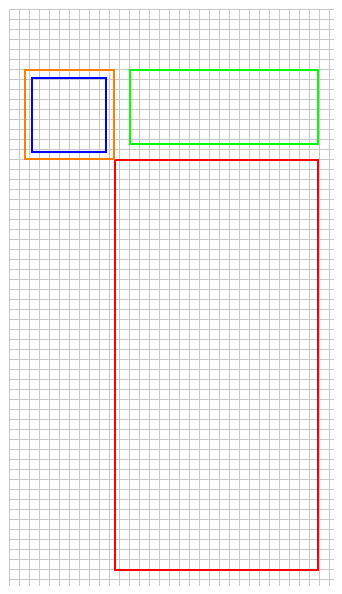

''

In [ ]:
plot_layout([input_template["Input layout"]])

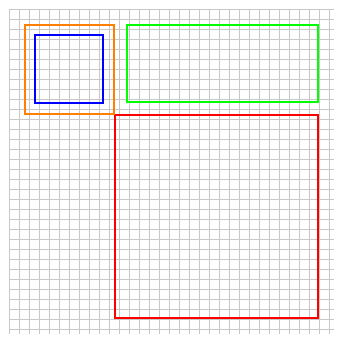

''

In [ ]:
plot_layout([input_template["Output layout"]])

In [ ]:
from torch_geometric.utils import to_dense_batch


all_labels = ["canvas", "image", "logo", "headline", "body", "cta", "graphicShape", "line"]


input_layout, output_layout = input_template["Input layout"], input_template["Output layout"]
input_size, output_size = [input_layout["width"], input_layout["height"]], [output_layout["width"], output_layout["height"]]

group_id = input_layout["groupId"]
size_type = f"{input_size[0]}x{input_size[1]}-{output_size[0]}x{output_size[1]}"

input_bbox = [[0, 0, input_layout["width"], input_layout["height"]]]
input_bbox += [[e["x"], e["y"], e["width"], e["height"]] for e in input_layout["elements"]]
input_bbox = torch.tensor(input_bbox, dtype=torch.float)

output_bbox = [[0, 0, output_layout["width"], output_layout["height"]]]
output_bbox += [[e["x"], e["y"], e["width"], e["height"]] for e in output_layout["elements"]]
output_bbox = torch.tensor(output_bbox, dtype=torch.float)

label = [all_labels.index("canvas")]
label += [all_labels.index(e["class"]) for e in input_layout["elements"]]
label = torch.tensor(label, dtype=torch.int)

bbox = torch.cat((input_bbox, output_bbox), dim=1)

input_data = Data(x=bbox, y=label)
input_data.attr = {
    "group_id": group_id,
    "size_type": size_type,
}

input_data

Data(
  x=[5, 8],
  y=[5],
  attr={
    group_id='1e95ba3dc4a248a2b5d2daaf0c0e5b68',
    size_type='1080x1920-1080x1080',
  }
)

In [ ]:
bbox, label, _, mask = sparse_to_dense(input_data)

print("label:", label)
print("mask:", mask)
print("bbox:", bbox)

seq_data = model.tokenizer.encode(
            {"input_bbox": bbox["input_bbox"],
              "output_bbox": bbox["output_bbox"],
              "label": label,
              "mask": mask})

seq_data

label: tensor([[0, 1, 3, 2, 6]], dtype=torch.int32)
mask: tensor([[True, True, True, True, True]])
bbox: {'input_bbox': tensor([[[   0.,    0., 1080., 1920.],
         [ 350.,  501.,  681., 1369.],
         [ 401.,  200.,  630.,  250.],
         [  76.,  227.,  250.,  250.],
         [  50.,  200.,  300.,  300.]]]), 'output_bbox': tensor([[[   0.,    0., 1080., 1080.],
         [ 350.,  350.,  680.,  680.],
         [ 390.,   50.,  640.,  260.],
         [  84.,   84.,  230.,  230.],
         [  50.,   50.,  300.,  300.]]])}


{'seq': tensor([[521,   0, 369, 519,   9, 140,   1, 331, 510,  49, 184,   3, 326, 423,
           54, 160,   2, 280, 423,  22, 162,   6, 287, 430,  17, 160, 522, 523,
          521,   0, 369, 495,   9, 140,   1, 331, 465,  49, 173,   3, 327, 425,
           53, 145,   2, 278, 421,  23, 150,   6, 287, 430,  17, 145, 522, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520]]),
 'masked_seq': tensor([[521,   0, 369, 519,   9, 140,   1, 331, 510,  49, 184,   3, 326, 423,
           54, 1

In [ ]:
gt = model.tokenizer.decode(seq_data["seq"])
gt

{'bbox': tensor([[[350.2500, 352.0000, 679.3636, 680.6000],
          [391.2000,  48.6666, 641.0000, 262.0000],
          [ 85.0000,  87.2000, 230.5999, 232.2142],
          [ 50.6087,  48.6666, 299.6315, 300.7999],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,   0.0000]]]),
 'label': tensor([[1, 3, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'mask': tensor([[ True,  True,  True,  True, False, False, False, False, False, False,
          False, False, False, False, False]])}

In [ ]:
def convert_layout(bbox, label, mask, layout_size):
    bbox, label = bbox[mask].round(), label[mask]

    layout = {"width": layout_size[0], "height": layout_size[1], "elements": []}
    for i in range(label.size(0)):
        element = {"class": all_labels[label[i]]}
        element["x"], element["y"], element["width"], element["height"] = bbox[i].int().tolist()
        layout["elements"].append(element)

    return layout

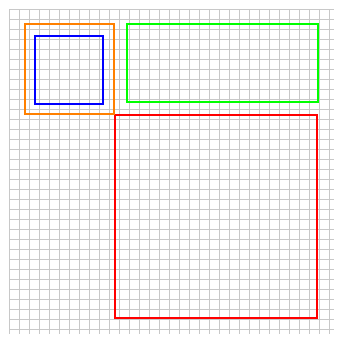

''

In [ ]:
output_template = convert_layout(gt["bbox"].squeeze(0), gt["label"].squeeze(0), gt["mask"].squeeze(0), output_size)
plot_layout([output_template])

In [ ]:
def process(input_data, tokenizer):
    bbox, label, _, mask = sparse_to_dense(input_data)
    data = tokenizer.encode(
            {"input_bbox": bbox["input_bbox"],
            "output_bbox": bbox["output_bbox"],
              "label": label,
              "mask": mask})

    return data

In [ ]:
inputs = process(input_data, model.tokenizer)
inputs

{'seq': tensor([[521,   0, 369, 519,   9, 140,   1, 331, 510,  49, 184,   3, 326, 423,
           54, 160,   2, 280, 423,  22, 162,   6, 287, 430,  17, 160, 522, 523,
          521,   0, 369, 495,   9, 140,   1, 331, 465,  49, 173,   3, 327, 425,
           53, 145,   2, 278, 421,  23, 150,   6, 287, 430,  17, 145, 522, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520,
          520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520]]),
 'masked_seq': tensor([[521,   0, 369, 519,   9, 140,   1, 331, 510,  49, 184,   3, 326, 423,
           54, 1

In [ ]:
n_samples = 5
pred = model.sample(batch_size=n_samples, inputs=inputs, sampling_cfg=sampling_cfg)
pred

0
28
tensor([[False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True]])
tensor([[10.7631, -0.8852, -1.0950,  ...,    -inf, -1.1881,    -inf],
        [10.7631, -0.8852, -1.0950,  ...,    -inf, -1.1881,    -inf],
        [10.7631, -0.8852, -1.0950,  ...,    -inf, -1.1881,    -inf],
        [10.7631, -0.8852, -1.0950,  ...,    -inf, -1.1881,    -inf],
        [10.7631, -0.8852, -1.0950,  ...,    -inf, -1.1881,    -inf]],
       grad_fn=<AsStridedBackward0>)
tensor([521,   0])
1
28
tensor([[ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True, False,  True],
        [ True,  True,  True,  ...,  True, False,  True]])
t

{'bbox': tensor([[[   0.0000,    0.0000,    0.0000,    0.0000],
          [  29.9574,   30.4582, 1080.0138, 1079.9656],
          [ 540.0690,   30.4582,  299.6315,  116.2379],
          [  68.2609,   30.4582, 1080.0138, 1079.9656],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000]],
 
         [[   0.0000,    0.0000,    0.0000,    0.0000],
          [  29.9574,   30.4582, 1080.0138, 1079.9656],
          [ 540.0690,   30.4582,  299

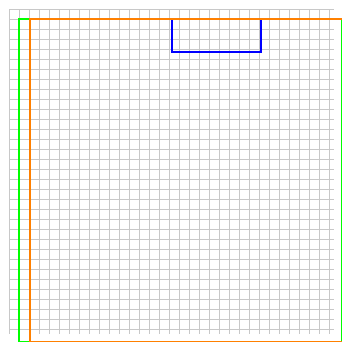

''

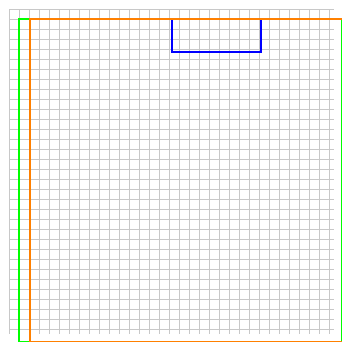

''

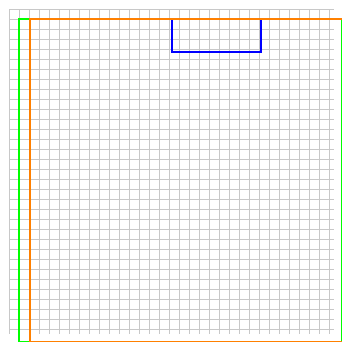

''

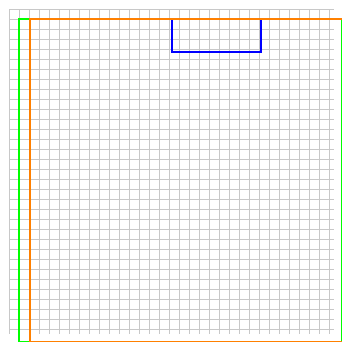

''

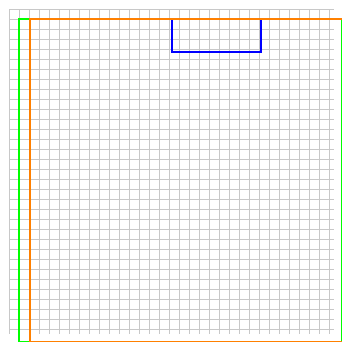

''

In [ ]:
output_templates = []
for i in range(pred["label"].size(0)):
    output_template = convert_layout(pred["bbox"][i], pred["label"][i], pred["mask"][i], output_size)
    output_templates.append(output_template)

output_templates
plot_layout(output_templates)